In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
batch_size = 32
num_classes = 10
epochs =100
data_augmentation = False

In [94]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [95]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [96]:
# convert the data to float and normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [97]:
# perform onehot encoding 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [98]:
#x_train.shape[1:]
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='elu',kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(Conv2D(32, (3,3),activation='elu',kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', input_shape=(32,32,3), activation='elu'))
model.add(Conv2D(64, (3,3),activation='elu',kernel_initializer='he_uniform',kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes)) 
model.add(Activation('softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 64)        

In [99]:
opti = keras.optimizers.Adam(learning_rate=0.001, decay = 1e-6)

model.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy'])

In [100]:
history = None
if not data_augmentation:
  print('Not using data augmentation.')
  history =  model.fit(x_train, y_train, batch_size=batch_size,
                       epochs = epochs,
                       validation_data = (x_test, y_test),
                       shuffle = True)
  
else:
  print('real - time data augmentation.')
  datagen = ImageDataGenerator(featurewise_center=False,
                               samplewise_center = False,
                               featurewise_std_normalization=False,
                               samplewise_std_normalization = False,
                               zca_whitening = False,
                               zca_epsilon = 1e-06,
                               rotation_range = 0.,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True,
                               vertical_flip = False,
                               shear_range=0.,
                               zoom_range=0.,
                               validation_split=0.0,
                               channel_shift_range = 0.,
                               fill_mode = 'reflect',
                               cval = 0.,
                               rescale = None,
                               preprocessing_function=None,
                               data_format = None)
  datagen.fit(x_train)
  history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                                epochs=epochs,
                                validation_data=(x_test,y_test),workers=4)

Not using data augmentation.
Epoch 1/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6178 - accuracy: 0.4571 - val_loss: 1.2211 - val_accuracy: 0.5953
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1073 - accuracy: 0.6235 - val_loss: 0.9037 - val_accuracy: 0.6998
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9670 - accuracy: 0.6777 - val_loss: 1.0807 - val_accuracy: 0.6846
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8834 - accuracy: 0.7074 - val_loss: 0.7850 - val_accuracy: 0.7449
Epoch 5/100
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8223 - accuracy: 0.7296 - val_loss: 0.7102 - val_accuracy: 0.7669
Epoch 6/100
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7706 - accuracy: 0.7452 - val_loss: 0.7411 - val_accuracy: 0.7606
Epoch 7/100
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7347 - accuracy: 0.763

In [106]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.6309 - accuracy: 0.8426
Test loss: 0.6308761239051819
Test accuracy: 0.8425999879837036


In [107]:
# make prediction.
pred = model.predict(x_test)

In [108]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']



# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]

X_test_errors = x_test[errors]


In [109]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.94      0.90      0.92      1000
           2       0.77      0.79      0.78      1000
           3       0.71      0.70      0.71      1000
           4       0.81      0.85      0.83      1000
           5       0.83      0.72      0.77      1000
           6       0.88      0.89      0.88      1000
           7       0.89      0.89      0.89      1000
           8       0.84      0.94      0.89      1000
           9       0.88      0.91      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



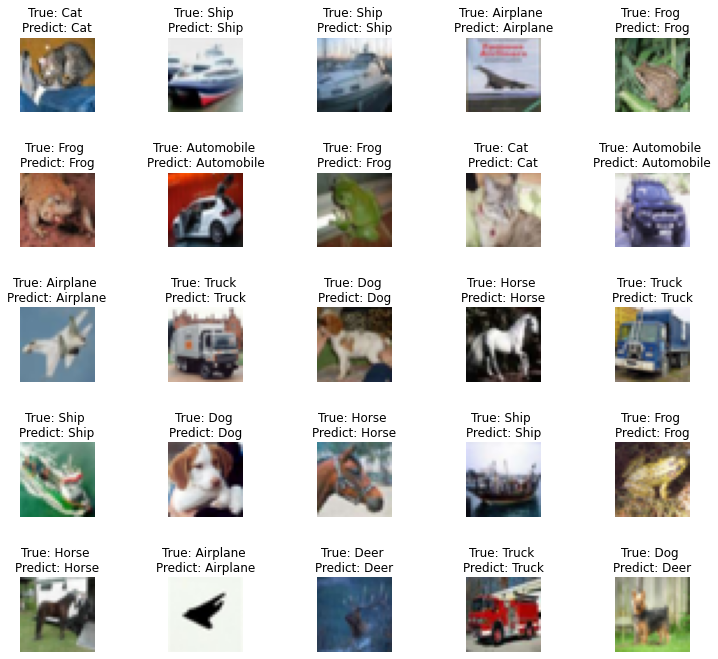

In [110]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)